# Examples of Gram Matrix kernel on Fuzzy Sets

# Pre-configuration

In [1]:
# Path
import sys
import os
qprc_path = os.path.abspath(os.path.join('..'))
if qprc_path not in sys.path:
    sys.path.append(qprc_path)

from  kernelfuzzy.fuzzyset import FuzzySet
from  kernelfuzzy.memberships import gaussmf

# Global imports

In [2]:
import numpy as np

# A toy fuzzy dataset

In this notebook, we are going to build a Gram Matrix from the successive application of the Cross-Product method. We are going to fuzzify artificial data and apply our kernel methods to find its correspondent Gram Matrix. The `kernels` module has the `gram_matrix_cross_product_kernel`, which applies the Cross-Product method, and build its Gram Matrix.  
Each observation is given by a tuple of fuzzy datasets.

In [3]:
num_rows = 2 #number of observations
num_cols = 2 #number of features/predictors  

# fuzzy dataset with empty fuzzy sets
fuzzy_dataset_empty = np.full((num_rows, num_cols), dtype=FuzzySet, fill_value=FuzzySet())

## Data fuzzyfication

The library have a built-in class for fuzzification of common data. Their class is called `FuzzyData`.

In [4]:
from kernelfuzzy.fuzzification import FuzzyData

fuzzy_dataset = FuzzyData.create_toy_fuzzy_dataset(num_rows=4, num_cols=2)
print('Fuzzy dataset\n', fuzzy_dataset, '\n shape', fuzzy_dataset.shape)

Fuzzy dataset
 [[<kernelfuzzy.fuzzyset.FuzzySet object at 0x7f0d01115160>
 shape (4, 2)


## Kernel Gram Matrix: linear kernels

Application of the `gram_matrix_cross_product_kernel` on linear kernels

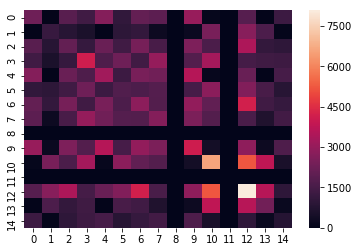

In [8]:
from kernelfuzzy.kernels import cross_product_kernel, gram_matrix_cross_product_kernel
from sklearn.metrics.pairwise import linear_kernel
import seaborn as sns
from typing import Callable, List

fuzzy_dataset = FuzzyData.create_toy_fuzzy_dataset(num_rows=15, num_cols=3)

# cross product kernel with linear kernels
K = gram_matrix_cross_product_kernel(fuzzy_dataset, fuzzy_dataset, linear_kernel, '', linear_kernel, '')
ax = sns.heatmap(K)

## Kernel Gram Matrix: RBF kernel and linear kernel

The Gram Matrix kernels are created from a fuzzy dataset. Each Gram Matrix is estimated via the cross-product kernel on the fuzzy sets, with a RBF kernel for the elements and a linear kernel for the membership degrees

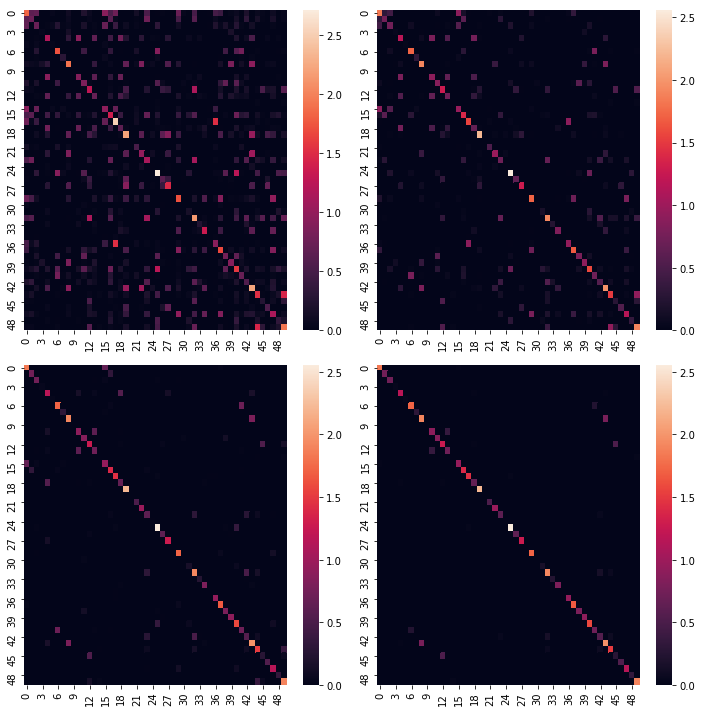

In [6]:
from sklearn.metrics.pairwise import rbf_kernel
import matplotlib.pyplot as plt

# fuzzy dataset
fuzzy_dataset = FuzzyData.create_toy_fuzzy_dataset(num_rows=50, num_cols=2)

kernel_bandwidth=[0.05, 0.5, 5, 50]

# plotting
fig, axn = plt.subplots(2, 2, figsize=(10,10))
for i, ax in enumerate(axn.flat):
    K = gram_matrix_cross_product_kernel(fuzzy_dataset, fuzzy_dataset, rbf_kernel, kernel_bandwidth[i], linear_kernel, '')
    sns.heatmap(K, ax=ax)

fig.tight_layout()

## Kernel Gram Matrix: RBF kernels

Gram Matrix estimated using the cross-product kernel on fuzzy sets, with a RBF kernel for the elements and a RBF kernel for the membership degrees

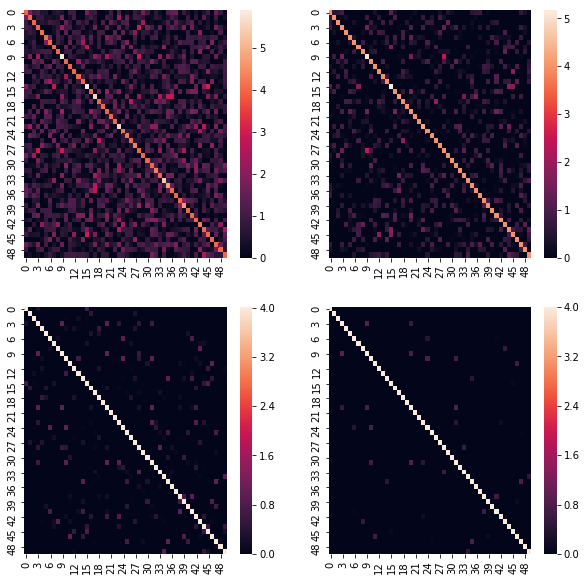

In [7]:
fig, axn = plt.subplots(2, 2,figsize=(10,10))
for i, ax in enumerate(axn.flat):
    K=gram_matrix_cross_product_kernel(fuzzy_dataset,fuzzy_dataset,rbf_kernel,kernel_bandwidth[i],rbf_kernel,kernel_bandwidth[i])
    sns.heatmap(K, ax=ax)